In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import json


In [3]:
# Risk Analytics
risk_metrics = pd.read_csv("../Risk Analytics Module/daily_risk_metrics.csv")
sector_exposure = pd.read_csv("../Risk Analytics Module/sector_exposure.csv")

# Backtesting
backtest_results = pd.read_csv("../Backtesting Framework & Strategies/backtest_results.csv")
backtest_wf = pd.read_csv("../Backtesting Framework & Strategies/backtest_results_walkforward.csv")

# Portfolio Optimization
target_weights = pd.read_csv("../Portfolio Optimization Module/target_weights.csv")
trade_recs = pd.read_csv("../Portfolio Optimization Module/trade_recommendations.csv")
risk_return = pd.read_csv("../Portfolio Optimization Module/portfolio_risk_return.csv")

# TCA
tca_summary = pd.read_csv("../Transaction Cost Analysis (TCA)/weekly_tca_summary.csv")


In [4]:
with pd.ExcelWriter("daily_report.xlsx") as writer:
    risk_metrics.to_excel(writer, sheet_name="Risk Metrics", index=False)
    sector_exposure.to_excel(writer, sheet_name="Sector Exposures", index=False)

    backtest_results.to_excel(writer, sheet_name="Backtest Results", index=False)
    backtest_wf.to_excel(writer, sheet_name="WalkForward Results", index=False)

    target_weights.to_excel(writer, sheet_name="Target Weights", index=False)
    trade_recs.to_excel(writer, sheet_name="Trade Recommendations", index=False)
    risk_return.to_excel(writer, sheet_name="Risk Return Report", index=False)

    tca_summary.to_excel(writer, sheet_name="TCA Summary", index=False)

print("Daily integrated report saved: daily_report.xlsx")


Daily integrated report saved: daily_report.xlsx


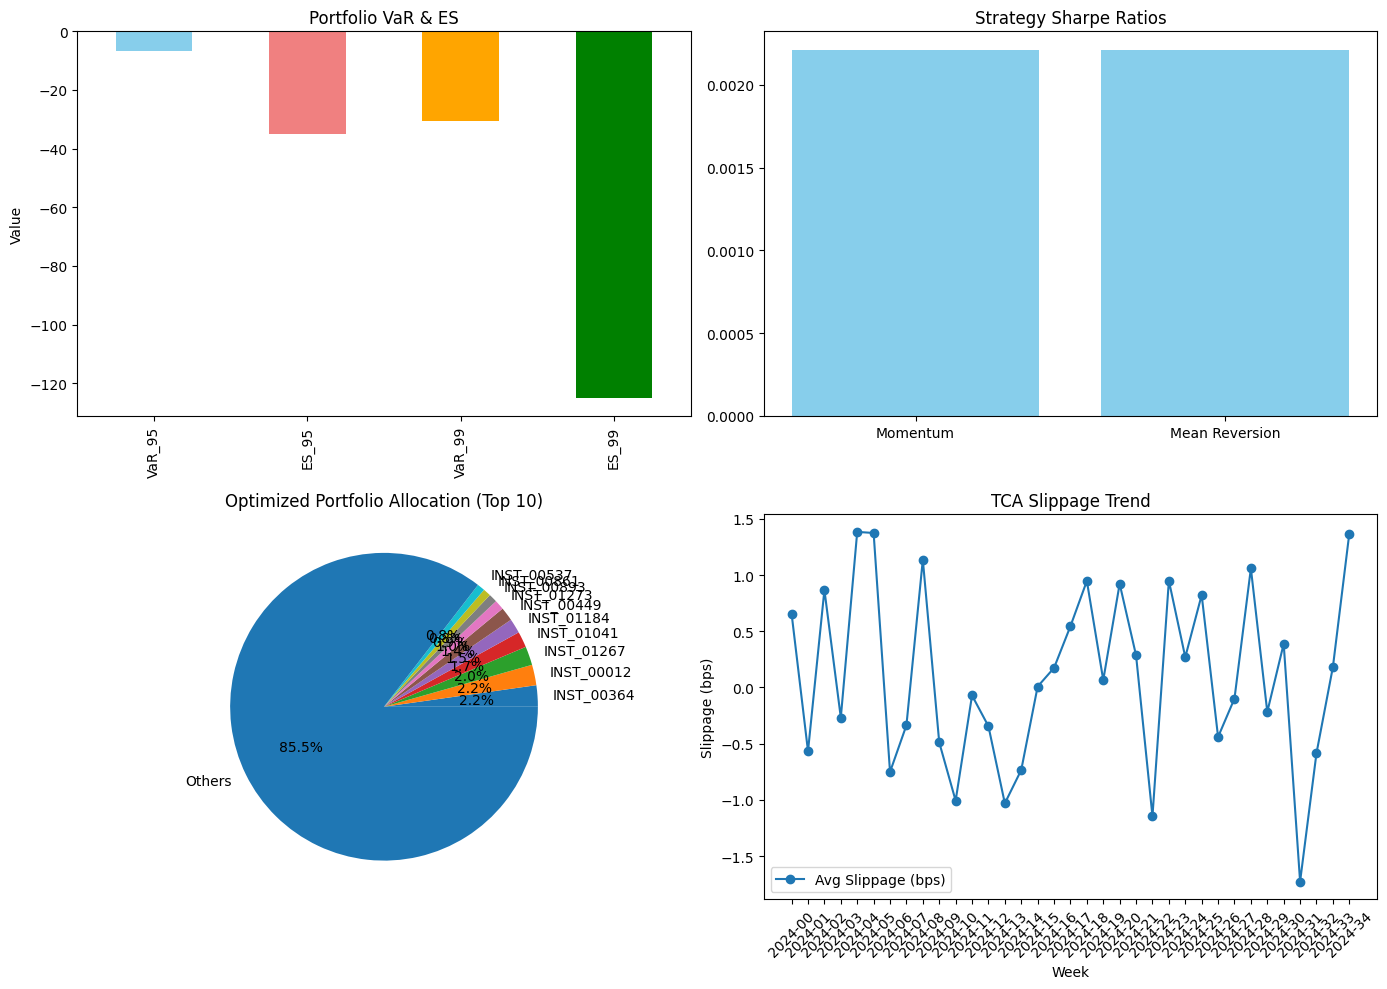

Clean summary charts saved: final_summary_charts.png


In [6]:
plt.figure(figsize=(14,10))

# Chart 1: VaR & ES as Bar Chart
plt.subplot(2,2,1)
if {"VaR_95", "VaR_99"}.issubset(risk_metrics.columns):
    var_es = risk_metrics[["VaR_95","ES_95","VaR_99","ES_99"]].dropna().iloc[0]
    var_es.plot(kind="bar", color=["skyblue","lightcoral","orange","green"])
    plt.title("Portfolio VaR & ES")
    plt.ylabel("Value")
else:
    plt.text(0.5,0.5,"No VaR/ES data", ha="center", va="center")

# Chart 2: Strategy Sharpe Ratios
plt.subplot(2,2,2)
if {"Sharpe","Strategy"}.issubset(backtest_results.columns):
    plt.bar(backtest_results["Strategy"], backtest_results["Sharpe"], color="skyblue")
    plt.title("Strategy Sharpe Ratios")
else:
    plt.text(0.5,0.5,"No Sharpe data", ha="center", va="center")

# Chart 3: Portfolio Allocation (Top 10 + Others)
plt.subplot(2,2,3)
if {"Target Weight","Instrument"}.issubset(target_weights.columns):
    tw = target_weights.sort_values("Target Weight", ascending=False)
    if len(tw) > 10:
        top10 = tw.head(10)
        others = pd.DataFrame({"Instrument":["Others"], "Target Weight":[tw["Target Weight"].iloc[10:].sum()]})
        tw = pd.concat([top10, others])
    plt.pie(tw["Target Weight"], labels=tw["Instrument"], autopct="%1.1f%%")
    plt.title("Optimized Portfolio Allocation (Top 10)")
else:
    plt.text(0.5,0.5,"No Portfolio data", ha="center", va="center")

# Chart 4: TCA Slippage Trend (Week vs Slippage)
plt.subplot(2,2,4)
if {"_week","avg_slippage_bps"}.issubset(tca_summary.columns):
    plt.plot(tca_summary["_week"], tca_summary["avg_slippage_bps"], marker="o", label="Avg Slippage (bps)")
    plt.title("TCA Slippage Trend")
    plt.xlabel("Week")
    plt.ylabel("Slippage (bps)")
    plt.xticks(rotation=45)   # Rotate x-axis labels
    plt.legend()
else:
    plt.text(0.5,0.5,"No TCA data", ha="center", va="center")

plt.tight_layout()
plt.savefig("final_summary_charts.png", dpi=300)
plt.show()

print("Clean summary charts saved: final_summary_charts.png")
